In [6]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences # type: ignore
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional # type: ignore
from tensorflow.keras.preprocessing.text import Tokenizer # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore

/Users/mirshahzadmubeen/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [1]:
print("hello")

hello


In [ ]:
df = pd.read_csv('grammer.csv')
text = [x for x,y in zip(df.input.values, df.labels.values) if y==1]


In [ ]:
corpus = [line.split(" ") for line in text]
corpus = corpus[:2000]

In [ ]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(corpus)

In [ ]:
total_words = len(tokenizer.word_index) + 1
print(f"total words:{total_words}")

total words:3284


In [ ]:
sequences = tokenizer.texts_to_sequences(corpus)
padded = pad_sequences(sequences,padding="post")

In [ ]:
input_sequences = []
labels = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i]
        input_sequences.append(n_gram_sequence)
        labels.append(token_list[i])

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,maxlen = max_sequence_len, padding = 'pre'))


In [ ]:
xs = input_sequences
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim =total_words, output_dim=240,input_shape =(max_sequence_len,)))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words,activation = "softmax"))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 72, 240)             │         788,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 300)                 │         469,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3284)                │         988,484 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,245,844 (8.57 MB)

 Trainable params: 2,245,844 (8.57 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
adam = Adam(learning_rate=0.01)
model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=40)


Epoch 1/40
666/666 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.1022 - loss: 6.3354
Epoch 2/40
666/666 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.1736 - loss: 5.3141
Epoch 3/40
666/666 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.1724 - loss: 5.6302
Epoch 4/40
666/666 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.1822 - loss: 5.0335
Epoch 5/40
666/666 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.2213 - loss: 4.3975
Epoch 6/40
666/666 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.2612 - loss: 3.8536
Epoch 7/40
666/666 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.2807 - loss: 3.6509
Epoch 8/40
666/666 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.2924 - loss: 3.5118
Epoch 9/40
666/666 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.3274 - loss: 3.2371
Epoch 10/40
666/666 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.3363 - loss: 3.1235
Epoch 11/40
666/666 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.3406 - loss: 3.1395
Epoch 12/40
666/666 ━━━━━━━━━━━━━━

In [ ]:
model.save('main.keras')

In [ ]:
model.save_weights('my_model.weights.h5')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

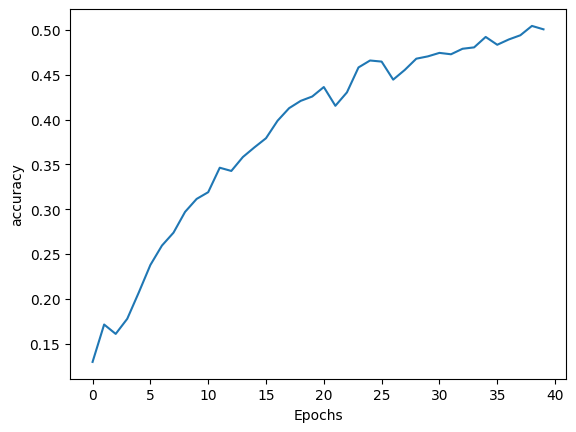

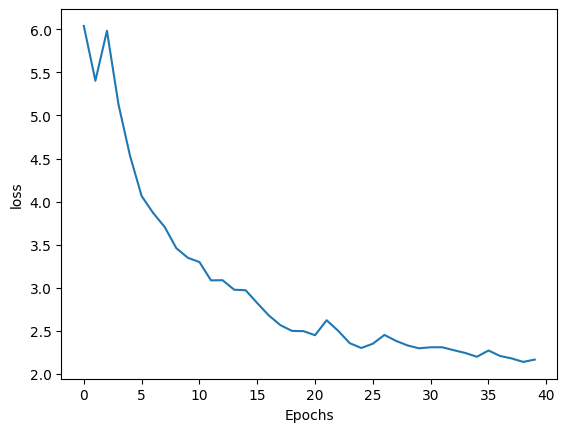

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

/Users/mirshahzadmubeen/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
df = pd.read_csv('grammer.csv')
text = [x for x,y in zip(df.input.values, df.labels.values) if y==1]

corpus = [line.split(" ") for line in text]
corpus = corpus[:2000]

In [3]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(corpus)

In [4]:
total_words = len(tokenizer.word_index) + 1
print(f"total words:{total_words}")

total words:3284


In [5]:
model = load_model('main.keras')
model.load_weights('my_model.weights.h5')

In [6]:
max_sequence_len = 20  # Use the value from training
while True:
    seed_text = input("Enter a sentence (or type 'q00' to quit): ")
    if seed_text == "q00":
        break

    next_words = 10  # Generate 10 words

    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break

        seed_text += " " + output_word
        if output_word == '.':
            break

    print("Generated text:", seed_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Generated text: I am going to the barber tomorrow .
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Generated text: She is reading a plan from the railway life .
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Generated text: hello, How are you , , , , , , , , ,
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/s

I am going to the
She is reading a
We are having a party at
I like to eat
It is a sunny day in
hello, How are 
the weather today is
We are planning to go for a